In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the cleaned dataset
df=pd.read_csv("new_cleaned_data.csv")
df

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [3]:
# removing unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]                # removing unnamed column
df

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        651 non-null    object 
 1   company     651 non-null    object 
 2   year        651 non-null    int64  
 3   Price       651 non-null    float64
 4   kms_driven  651 non-null    int64  
 5   fuel_type   651 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 30.6+ KB


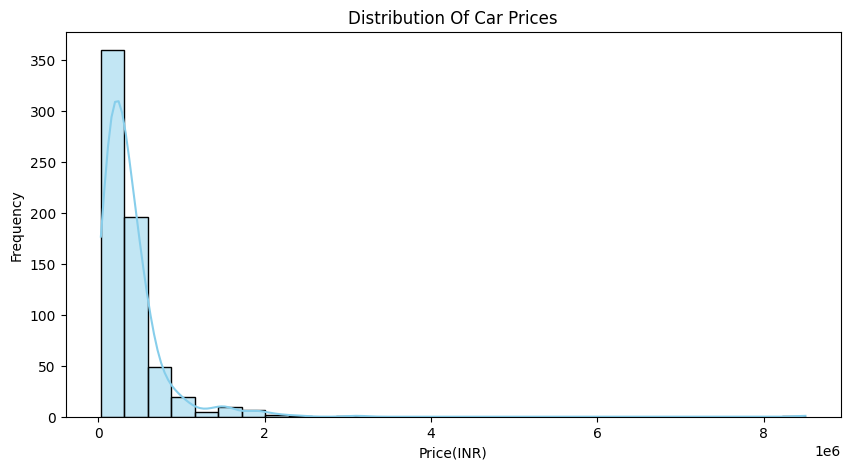

In [5]:
#Distribution Of Car Prices
plt.figure(figsize=(10,5))
sns.histplot(df['Price'],bins=30,kde=True,color='skyblue')
plt.title('Distribution Of Car Prices')
plt.xlabel('Price(INR)')
plt.ylabel('Frequency')
plt.show()

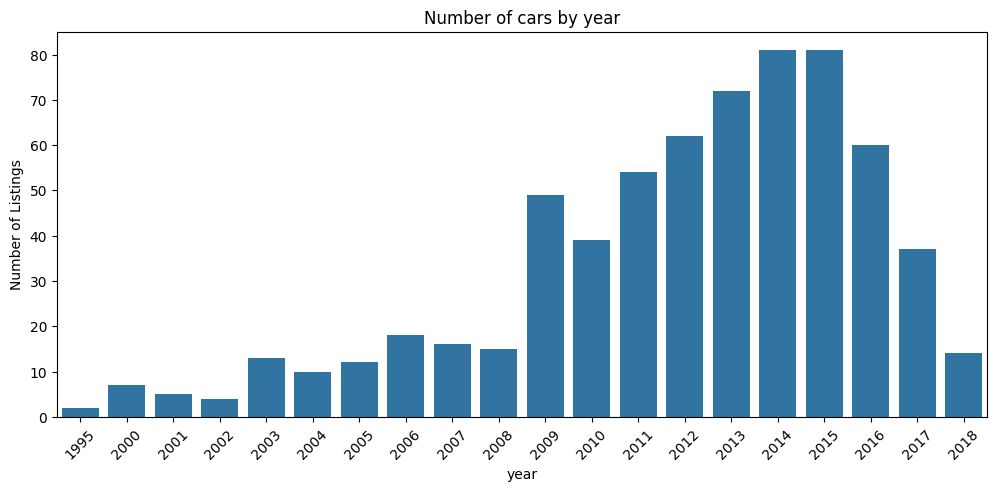

In [6]:
#Car by Manufacturing Year
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='year',order=sorted(df['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of cars by year')
plt.xlabel('year')
plt.ylabel('Number of Listings')
plt.show()

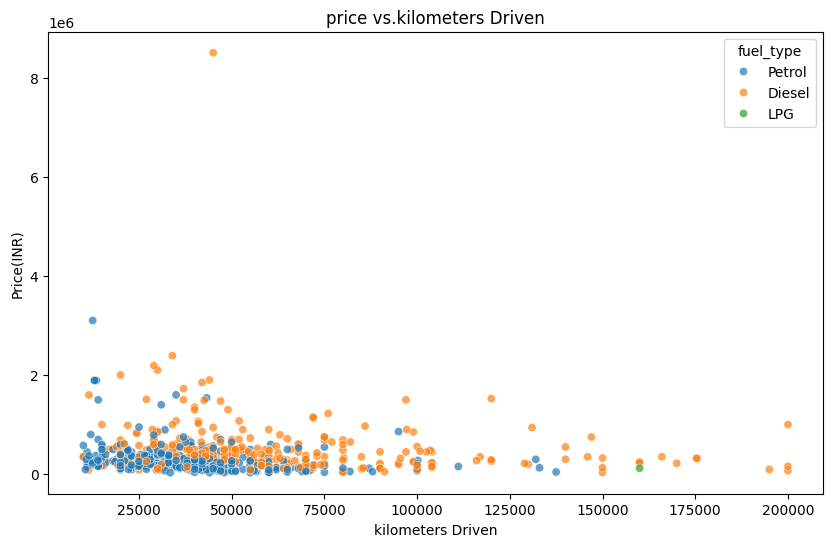

In [7]:
#KMs Driven vs.Price(Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='kms_driven',y='Price',hue='fuel_type',alpha=0.7) 
plt.title('price vs.kilometers Driven')
plt.xlabel('kilometers Driven')
plt.ylabel('Price(INR)')
plt.legend(title='fuel_type')
plt.show()
                   

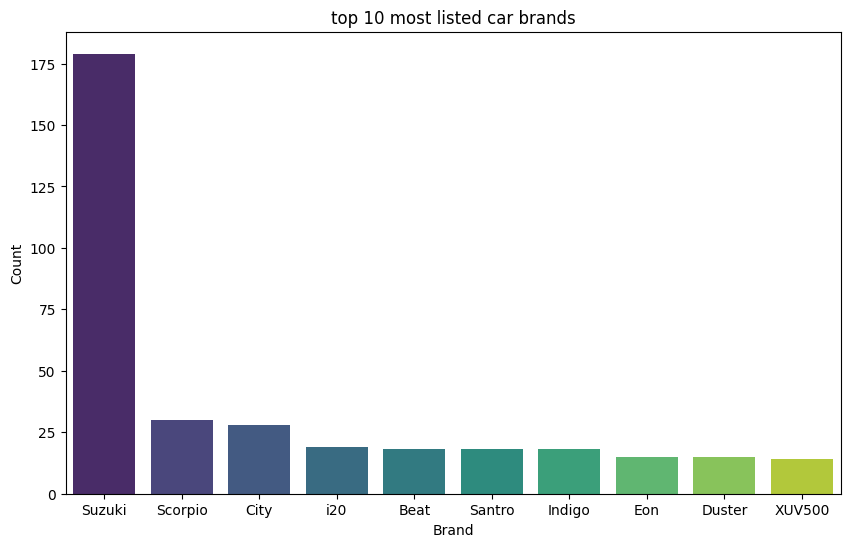

In [8]:
#Top 10 Most Listed Car Brands
df['brand']=df['name'].str.split().str[0] #extract brand
top_brands=df['brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index,y=top_brands.values,palette='viridis')
plt.title('top 10 most listed car brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

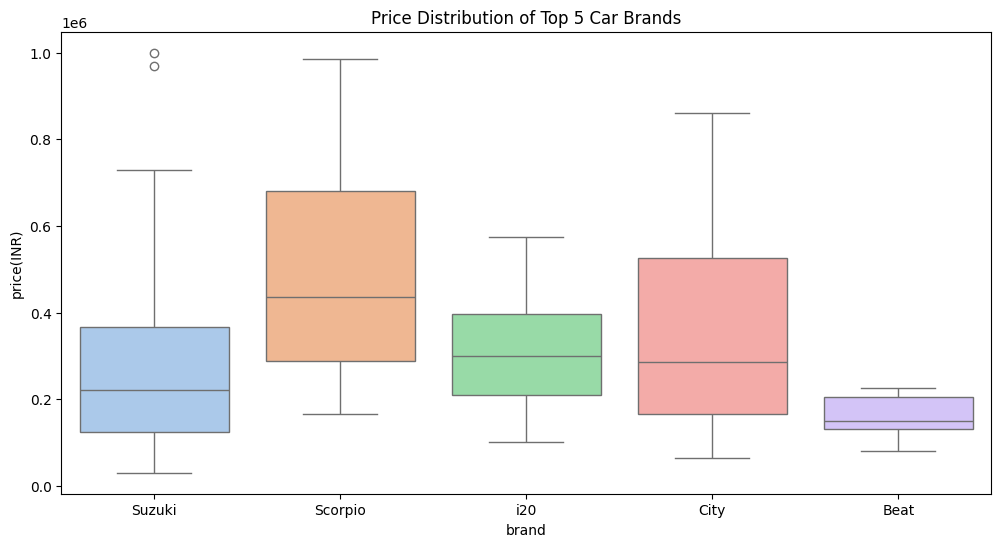

In [9]:
#Price Comparison of Top Brands(Boxplot)
top5=df['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['brand'].isin(top5)],x='brand',y='Price',palette='pastel')
plt.title("Price Distribution of Top 5 Car Brands")
plt.xlabel('brand')
plt.ylabel('price(INR)')
plt.show()

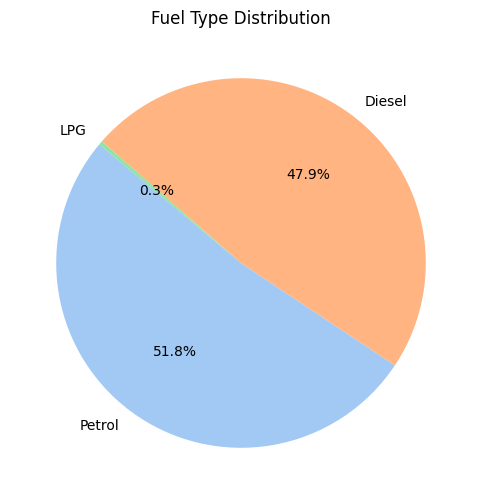

In [10]:
#Fuel Type Distribution
fuel_counts=df['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts,labels=fuel_counts.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.show()

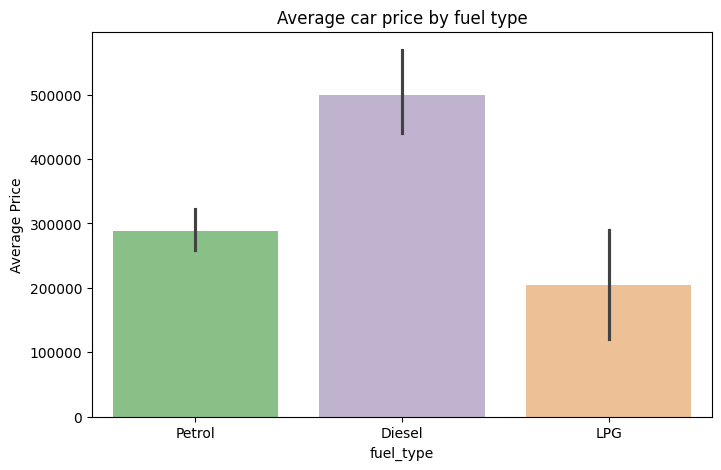

In [11]:
#Average Price by Fuel Type
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='fuel_type',y='Price',estimator='mean',palette='Accent')
plt.title('Average car price by fuel type')
plt.xlabel('fuel_type')
plt.ylabel('Average Price')
plt.show()

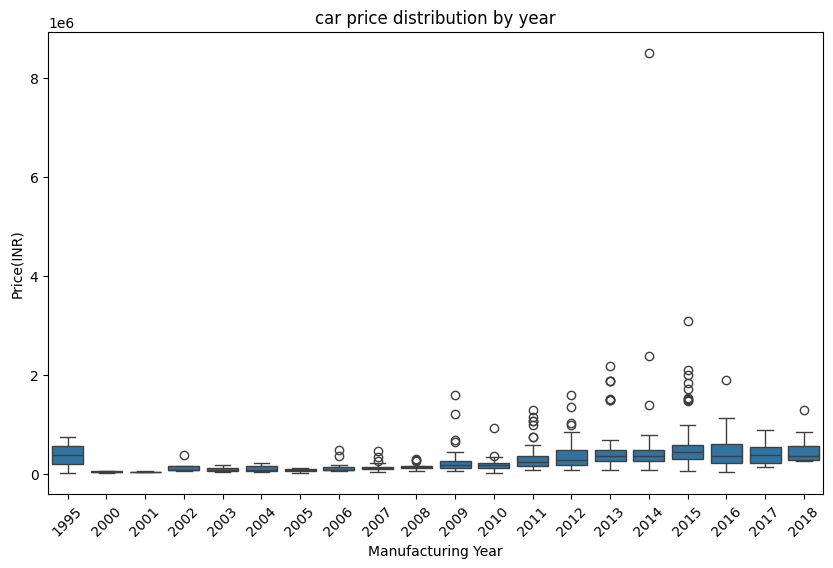

In [12]:
#Relationship Between Year and Price
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='year',y='Price')
plt.xticks(rotation=45)
plt.title('car price distribution by year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price(INR)')
plt.show()

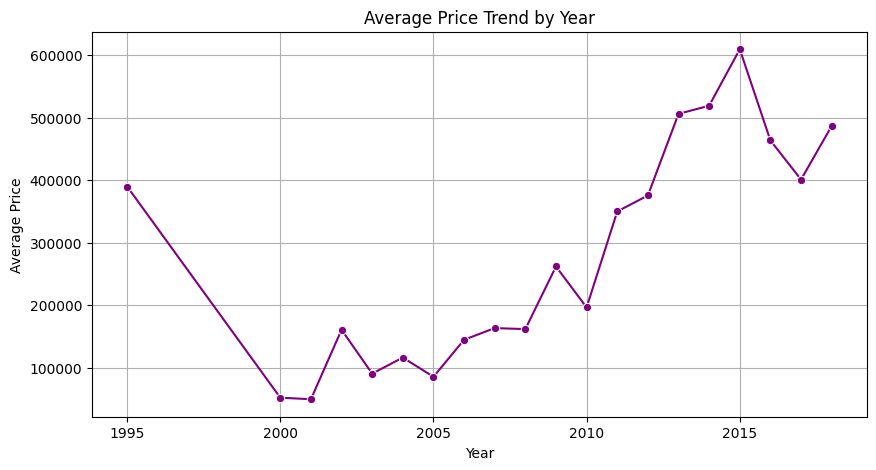

In [13]:
#Price Trend Over Years(Mean Price per Year)
avg_price_by_year=df.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year,x='year',y='Price',marker='o',color='purple')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

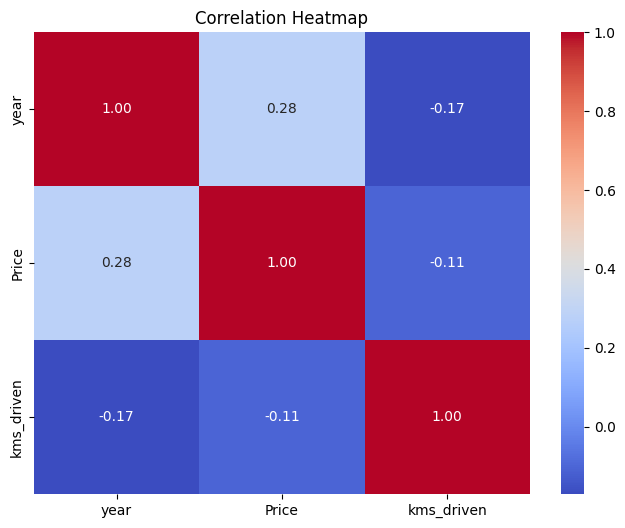

In [14]:
#correlation Heatmap
plt.figure(figsize=(8,6))
numeric_cols=df.select_dtypes(include='number')
corr_matrix=numeric_cols.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()